# Welcome to Movie Data Analysis
All questions are answered in the order they were asked. Appropriate segment titles have been given to indicate the corresponding question. This was meant to be run as a notebook natively and not as HTML where all the output of all cells is automatically expanded. There are many calls to print values() for demonstration purposes which make the notebook look really bad in HTML.

In [1]:
import pandas as pd #The pandas library
import pandas_datareader.data as web # For accessing web data
from pandas import Series, DataFrame #Main pandas data structures

import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl

import seaborn as sns #A more fancy plotting library

from datetime import datetime #For handling dates

import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library

import sys
import numpy as np

#pd.__version__

#For presenting plots inline
%matplotlib inline 

In [2]:
#pd.options.display.max_rows = 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
movie_data = pd.read_csv('movies.csv')

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 16 columns):
Title                     3201 non-null object
US Gross                  3201 non-null object
Worldwide Gross           3201 non-null object
US DVD Sales              564 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
MPAA Rating               2596 non-null object
Running Time (min)        1209 non-null float64
Distributor               2969 non-null object
Source                    2836 non-null object
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Director                  1870 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(6), object(10)
memory usage: 400.2+ KB


# Cleaning the data

## Removing unnecessary columns
First of, we are removing columns which do not contribute to our research. These columns are 'Distributor', 'Source', 'Director', 'MPAA Rating' and 'US DVD Sales'. Of course, if we wanted to perform some groupings by these attributes we wouldn't be doing this operation but we know ahead of time we won't be needing them allowing us to offload some initial weight.

In [5]:
movie_data = movie_data.drop(['Distributor','Source','Director','US DVD Sales','MPAA Rating'],axis=1)
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 11 columns):
Title                     3201 non-null object
US Gross                  3201 non-null object
Worldwide Gross           3201 non-null object
Production Budget         3200 non-null float64
Release Date              3201 non-null object
Running Time (min)        1209 non-null float64
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(5), object(6)
memory usage: 275.2+ KB


## Tidying the 'Worldwide Gross' and 'US Gross' attributes
Next up, we want to convert all numeric attributes to actual numeric types. 'Worldwide Gross' is one of those attributes. By taking a look at the attribute domain we notice that there exist values 'Unknown' and '0' which prevent us from converting the string type attribute (or 'object' to be more precise...) to float. Following this discovery, we would like to possibly handle all the rows that contain these values. So, we take a look at the magnitude of the problem we are facing to determine what impact it might have later on in our findings.

In [6]:
movie_data['Worldwide Gross'].values

array(['146083', '10876', '203134', '373615', '1087521', '2624551',
       '44705', '6026908', '6341825', '20400000', '37600000', '37402877',
       '13129846', '29548291', '5228617', '3000000', '2000000', '5000000',
       '80000000', '0', '168841459', '0', '94875000', '18435', '68700000',
       '28200000', '8000000', '72544', '1027228', '22139590', '167780960',
       '11744960', '172569', '2300000', '4301000', '42488161',
       '242895809', '84689', '10000000', '6734844', '132999811',
       '54243125', '20257000', '107217396', '212400000', '12947763',
       '64359', '8000000', '0', '669276', '7900000', '4000000',
       '36299670', '274299', '140000000', '4000000', '107822813',
       '38251425', '9598', '24103594', '24600000', '78800000', '53208180',
       '14900000', '23616', '15200000', '8158', '42000000', '0',
       '20000000', '800000', '246100000', '3127472', '16581575',
       '4496583', '12671300', '381109762', '332000000', '243700000',
       '102308900', '141247413',

- All the rows having 'Unknown' Worldwide Gross

In [7]:
movie_data.loc[movie_data['Worldwide Gross'] == 'Unknown']

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,Running Time (min),Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
118,Bananas,Unknown,Unknown,2000000.0,28-Apr-71,NaN,Comedy,NaN,89.0,7.1,12415.0
254,Damnation Alley,Unknown,Unknown,17000000.0,21-Oct-77,NaN,NaN,NaN,NaN,4.7,1655.0
266,Death Race 2000,Unknown,Unknown,300000.0,1-Apr-75,NaN,NaN,Science Fiction,84.0,6.1,10015.0
404,Hell's Angels,Unknown,Unknown,4000000.0,1930,NaN,NaN,NaN,90.0,7.9,2050.0
467,Intolerance,Unknown,Unknown,385907.0,5-Sep-16,NaN,NaN,NaN,96.0,NaN,NaN
1025,Waterloo,Unknown,Unknown,25000000.0,1-Jan-70,NaN,NaN,NaN,NaN,NaN,NaN
1028,Wings,Unknown,Unknown,2000000.0,12-Aug-27,NaN,NaN,NaN,96.0,7.9,3035.0


Since we want to convert the values to float64, pandas offers us the NaN value to indicate missing data. It is convertable and is detectable easily later on. So, we go ahead and convert all 'Unknown' and '0' strings to 'NaN'.

In [8]:
movie_data.loc[movie_data['Worldwide Gross'] == 'Unknown', 'Worldwide Gross'] = 'NaN'
movie_data.loc[movie_data['US Gross'] == 'Unknown', 'US Gross'] = 'NaN'
movie_data.loc[movie_data['Worldwide Gross'] == '0', 'Worldwide Gross'] = 'NaN'
movie_data.loc[movie_data['US Gross'] == '0', 'US Gross'] = 'NaN'

We move on to successfully convert the 'Worldwide Gross' and 'US Gross' columns to float64.

In [9]:
movie_data['Worldwide Gross'] = movie_data['Worldwide Gross'].astype('float64')
movie_data['US Gross'] = movie_data['US Gross'].astype('float64')
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 11 columns):
Title                     3201 non-null object
US Gross                  3128 non-null float64
Worldwide Gross           3147 non-null float64
Production Budget         3200 non-null float64
Release Date              3201 non-null object
Running Time (min)        1209 non-null float64
Major Genre               2926 non-null object
Creative Type             2755 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2988 non-null float64
IMDB Votes                2988 non-null float64
dtypes: float64(7), object(4)
memory usage: 275.2+ KB


## Converting the 'Release Date' column
We reach our next converting point. This time the 'Release Date' column, which is currently set as a dtype=**object**, should be converted to the handy **datetime** dtype provided by **pandas**. We take a look at it's domain to spot problems in the conversion:

In [10]:
movie_data['Release Date'].values

array(['12-Jun-98', '7-Aug-98', '28-Aug-98', '11-Sep-98', '9-Oct-98',
       '15-Jan-99', '4-Apr-99', '9-Apr-99', '1-Jul-86', '31-Dec-46',
       '7-Oct-63', '11-Dec-68', '25-Dec-62', '23-Sep-70', '1-Mar-87',
       '17-Sep-20', '1-Aug-44', '1-Jan-70', '5-Oct-56', '13-Apr-57',
       '27-Dec-95', '9-Nov-72', '14-Dec-79', '29-Jun-07', '2-Apr-68',
       '23-Dec-54', '24-Dec-16', '15-Apr-98', '30-Jul-99', '3-Apr-08',
       '25-Nov-87', '6-May-94', '28-Sep-05', '9-Mar-33', '25-Dec-95',
       '22-May-81', '9-Mar-94', '18-Oct-06', '1963', '21-Feb-86',
       '4-Jul-08', '9-Aug-89', '12-Feb-88', '4-Feb-94', '10-Nov-95',
       '27-Mar-86', '26-Mar-99', '17-May-50', '28-Jul-51', '25-Aug-95',
       '24-Oct-60', '1938', '15-Jan-93', '24-Jan-03', '11-Aug-73', '1987',
       '17-Nov-95', '20-Apr-77', '8-Sep-00', '2-Apr-93', '1960',
       '15-Aug-79', '18-Jul-90', '25-Dec-07', '19-Oct-07', '1-Jan-71',
       '1-Jun-07', '17-Oct-56', '10-Oct-68', '1975', 'March, 1987',
       '4-Aug-95', '24-Ma

Similar to the previous process, our dataset has some unconvertable values or some partial ones. More precisely, some movies have a release date of 'TBD' meaning 'To Be Determined'. Let's take a look at these rows... 

In [11]:
movie_data.loc[movie_data['Release Date'] == 'TBD']

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,Running Time (min),Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
267,Drei,NaN,NaN,7200000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN
571,The Magic Flute,NaN,NaN,27000000.0,TBD,NaN,NaN,NaN,NaN,6.4,499.0
824,Sea Rex 3D: Journey to a Prehistoric World,NaN,NaN,5000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN
1339,"Story of Bonnie and Clyde, The",NaN,NaN,20000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN
1377,Barney's Version,NaN,NaN,30000000.0,TBD,NaN,NaN,NaN,NaN,NaN,NaN
1891,Hannibal the Conqueror,NaN,NaN,50000000.0,TBD,NaN,NaN,Dramatization,NaN,NaN,NaN
2007,I Come with the Rain,NaN,627422.0,18000000.0,TBD,NaN,NaN,NaN,NaN,5.2,618.0


These rows above are probably unreleased movies which do not contribute in the slightest. So we delete them without further hesitation.

In [12]:
movie_data = movie_data[movie_data['Release Date'] != 'TBD']
movie_data['Release Date'] = pd.to_datetime(movie_data['Release Date'])
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3200
Data columns (total 11 columns):
Title                     3194 non-null object
US Gross                  3128 non-null float64
Worldwide Gross           3146 non-null float64
Production Budget         3193 non-null float64
Release Date              3194 non-null datetime64[ns]
Running Time (min)        1209 non-null float64
Major Genre               2926 non-null object
Creative Type             2754 non-null object
Rotten Tomatoes Rating    2321 non-null float64
IMDB Rating               2986 non-null float64
IMDB Votes                2986 non-null float64
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 299.4+ KB


While the conversion didn't raise any errors we notice that some datetime values have a wrong year set. Pandas converted some of the dates to the 21st century instead of the 20th century. (2063 instead of 1963) So, we decrease the year value by 100 years for all dates beyond 2019, as of the time of writing this notebook.

In [13]:
movie_data['Release Date'].values

array(['1998-06-12T00:00:00.000000000', '1998-08-07T00:00:00.000000000',
       '1998-08-28T00:00:00.000000000', '1998-09-11T00:00:00.000000000',
       '1998-10-09T00:00:00.000000000', '1999-01-15T00:00:00.000000000',
       '1999-04-04T00:00:00.000000000', '1999-04-09T00:00:00.000000000',
       '1986-07-01T00:00:00.000000000', '2046-12-31T00:00:00.000000000',
       '2063-10-07T00:00:00.000000000', '2068-12-11T00:00:00.000000000',
       '2062-12-25T00:00:00.000000000', '1970-09-23T00:00:00.000000000',
       '1987-03-01T00:00:00.000000000', '2020-09-17T00:00:00.000000000',
       '2044-08-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '2056-10-05T00:00:00.000000000', '2057-04-13T00:00:00.000000000',
       '1995-12-27T00:00:00.000000000', '1972-11-09T00:00:00.000000000',
       '1979-12-14T00:00:00.000000000', '2007-06-29T00:00:00.000000000',
       '2068-04-02T00:00:00.000000000', '2054-12-23T00:00:00.000000000',
       '2016-12-24T00:00:00.000000000', '1998-04-15

In [14]:
def castdown_year(a):
    if a.year > 2019:
        return a.replace(year= a.year - 100)
    return a

movie_data['Release Date'] = movie_data['Release Date'].apply(lambda x: castdown_year(x))
movie_data['Release Date'].values

array(['1998-06-12T00:00:00.000000000', '1998-08-07T00:00:00.000000000',
       '1998-08-28T00:00:00.000000000', '1998-09-11T00:00:00.000000000',
       '1998-10-09T00:00:00.000000000', '1999-01-15T00:00:00.000000000',
       '1999-04-04T00:00:00.000000000', '1999-04-09T00:00:00.000000000',
       '1986-07-01T00:00:00.000000000', '1946-12-31T00:00:00.000000000',
       '1963-10-07T00:00:00.000000000', '1968-12-11T00:00:00.000000000',
       '1962-12-25T00:00:00.000000000', '1970-09-23T00:00:00.000000000',
       '1987-03-01T00:00:00.000000000', '1920-09-17T00:00:00.000000000',
       '1944-08-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1956-10-05T00:00:00.000000000', '1957-04-13T00:00:00.000000000',
       '1995-12-27T00:00:00.000000000', '1972-11-09T00:00:00.000000000',
       '1979-12-14T00:00:00.000000000', '2007-06-29T00:00:00.000000000',
       '1968-04-02T00:00:00.000000000', '1954-12-23T00:00:00.000000000',
       '2016-12-24T00:00:00.000000000', '1998-04-15

## Renaming attributes
Finally, we are going to rename some of the attributes to make them easier to use. We just rename two attribute labels to make them smaller. The reason for not changing anything else is that it is not needed. The current labels provide clarity to the reader. Also, I prefer to access said data by the "df.['attribute_name']" way instead of "df.attrribute_name" to avoid confusion with DataFrame methods and properties.

In [15]:
movie_data.rename(columns={'Running Time (min)': 'Duration',
                           'Production Budget': 'Budget'})

,Title,US Gross,Worldwide Gross,Budget,Release Date,Duration,Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,8000000.0,1998-06-12,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,300000.0,1998-08-07,NaN,Drama,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,250000.0,1998-08-28,NaN,Comedy,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,300000.0,1998-09-11,NaN,Comedy,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,1000000.0,1998-10-09,NaN,Drama,Contemporary Fiction,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,24000000.0,2008-10-31,101.0,Comedy,Contemporary Fiction,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,85000000.0,2007-03-02,157.0,Thriller/Suspense,Dramatization,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,35000000.0,2006-08-11,NaN,Adventure,Super Hero,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,80000000.0,2005-10-28,129.0,Adventure,Historical Fiction,26.0,5.7,21161.0


## Handling missing data
Throughout our dataset, many entries have missing values. In order to deal with them, we first need to see if we can spot a pattern in these entries. We begin by handling the missing ratings:

In [16]:
movie_data.loc[movie_data['Rotten Tomatoes Rating'].isnull()]

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,Running Time (min),Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,8000000.0,1998-06-12,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,300000.0,1998-08-07,NaN,Drama,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,250000.0,1998-08-28,NaN,Comedy,NaN,NaN,6.8,865.0
5,Mississippi Mermaid,24551.0,2624551.0,1600000.0,1999-01-15,NaN,NaN,NaN,NaN,NaN,NaN
6,Following,44705.0,44705.0,6000.0,1999-04-04,NaN,NaN,NaN,NaN,7.7,15133.0
...,...,...,...,...,...,...,...,...,...,...,...
3185,"Yours, Mine and Ours",53359917.0,72359917.0,45000000.0,2005-11-23,90.0,Comedy,Contemporary Fiction,NaN,7.6,259.0
3187,Youth in Revolt,15285588.0,17585588.0,18000000.0,2010-01-08,NaN,Comedy,Contemporary Fiction,NaN,6.7,14670.0
3188,Y Tu Mama Tambien (And Your Mother Too),13649881.0,33649881.0,5000000.0,2002-03-15,NaN,Drama,Contemporary Fiction,NaN,NaN,NaN
3189,Yu-Gi-Oh,19762690.0,28762690.0,20000000.0,2004-08-13,NaN,Adventure,Kids Fiction,NaN,NaN,NaN


In [17]:
movie_data.loc[movie_data['IMDB Rating'].isnull()]

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,Running Time (min),Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
3,Let's Talk About Sex,373615.0,373615.0,300000.0,1998-09-11,NaN,Comedy,NaN,13.0,NaN,NaN
5,Mississippi Mermaid,24551.0,2624551.0,1600000.0,1999-01-15,NaN,NaN,NaN,NaN,NaN,NaN
13,"Tora, Tora, Tora",29548291.0,29548291.0,25000000.0,1970-09-23,NaN,NaN,NaN,NaN,NaN,NaN
15,Over the Hill to the Poorhouse,3000000.0,3000000.0,100000.0,1920-09-17,NaN,NaN,NaN,NaN,NaN,NaN
25,"20,000 Leagues Under the Sea",28200000.0,28200000.0,5000000.0,1954-12-23,NaN,Adventure,NaN,92.0,NaN,NaN
26,"20,000 Leagues Under the Sea",8000000.0,8000000.0,200000.0,2016-12-24,NaN,Adventure,NaN,NaN,NaN,NaN
29,Three Kingdoms: Resurrection of the Dragon,NaN,22139590.0,20000000.0,2008-04-03,NaN,Action,Historical Fiction,NaN,NaN,NaN
45,April Fool's Day,12947763.0,12947763.0,5000000.0,1986-03-27,NaN,Horror,Contemporary Fiction,31.0,NaN,NaN
51,Alexander's Ragtime Band,4000000.0,4000000.0,2000000.0,1938-01-01,NaN,Drama,NaN,NaN,NaN,NaN
72,Boynton Beach Club,3127472.0,3127472.0,2900000.0,2006-03-24,104.0,Romantic Comedy,Contemporary Fiction,NaN,NaN,NaN


In [18]:
movie_data.loc[movie_data['Rotten Tomatoes Rating'].isnull() & movie_data['IMDB Rating'].isnull()]

,Title,US Gross,Worldwide Gross,Production Budget,Release Date,Running Time (min),Major Genre,Creative Type,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
5,Mississippi Mermaid,24551.0,2624551.0,1600000.0,1999-01-15,NaN,NaN,NaN,NaN,NaN,NaN
13,"Tora, Tora, Tora",29548291.0,29548291.0,25000000.0,1970-09-23,NaN,NaN,NaN,NaN,NaN,NaN
15,Over the Hill to the Poorhouse,3000000.0,3000000.0,100000.0,1920-09-17,NaN,NaN,NaN,NaN,NaN,NaN
26,"20,000 Leagues Under the Sea",8000000.0,8000000.0,200000.0,2016-12-24,NaN,Adventure,NaN,NaN,NaN,NaN
29,Three Kingdoms: Resurrection of the Dragon,NaN,22139590.0,20000000.0,2008-04-03,NaN,Action,Historical Fiction,NaN,NaN,NaN
51,Alexander's Ragtime Band,4000000.0,4000000.0,2000000.0,1938-01-01,NaN,Drama,NaN,NaN,NaN,NaN
72,Boynton Beach Club,3127472.0,3127472.0,2900000.0,2006-03-24,104.0,Romantic Comedy,Contemporary Fiction,NaN,NaN,NaN
91,The Ballad of Gregorio Cortez,909000.0,909000.0,1305000.0,1983-08-19,NaN,Western,Historical Fiction,NaN,NaN,NaN
94,Big Things,NaN,NaN,50000.0,2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
104,"The Book of Mormon Movie, Volume 1: The Journey",1660865.0,1660865.0,2000000.0,2003-09-12,NaN,Drama,Historical Fiction,NaN,NaN,NaN


All of the rows above are missing their **'Rotten Tomatoes Rating'** and **'IMDB Rating'** values. We also note that they are missing their **'IMDB Votes'** value, which is derived from the fact that they don't have a rating. From this, we can safely say that we do not have **corrupt** data inside our dataset (at least for the case of missing ratings) in the sense that there's no **'IMDB Votes'** value with a NaN **'IMDB Rating'** value which would indicate **'Missing not at Random'** data.

These rows might be missing their ratings partially or completely but still have valuable information to contribute unaffected by the missing values. Also they are many and deleting them would decrease the size of our already small dataset. We can delete, though, entries which have very little data. We define an entry **incomplete** those which are missing  **'Worldwide Gross'**,**'Rotten Tomatoes Rating'** and **'IMDB Rating'** values. 

In [19]:
movie_data.drop(movie_data[movie_data['Rotten Tomatoes Rating'].isnull() & 
                           movie_data['IMDB Rating'].isnull() & 
                           movie_data['Worldwide Gross'].isnull()].index, 
                                                                inplace=True)

# 1. Basic Histograms & First Analysis

## Worldwide Gross Histogram
The 'Worldwide Gross' attribute seems like it's following a geometric distribution. A big chunk of movies from our dataset make up to \\$250 million. Some go even beyond that and make around \\$500 million. Of course, there exist some blockbusters making the big bucks of even (!) \\$1 billion. Comparatively, as we go into higher and higher grosses, the less movies we find there. An interesting research would be a comparison between a movies budget and its worldwide gross.

*(! Note from the future, this is an early attempt at analyzing the graph. Some results may "seem" wrong but are clarified later on!)* 

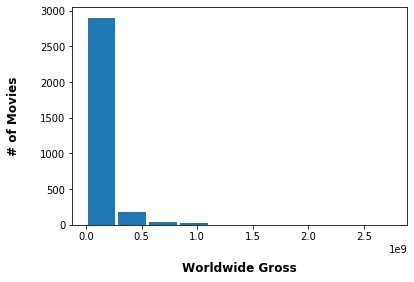

In [20]:
axes = movie_data.hist(column='Worldwide Gross', grid=False, rwidth=0.9)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("Worldwide Gross", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

## Rotten Tomatoes Ratings Histogram
*The leftmost bin represents the number of missing ratings.* The distribution of the Rotten Tomatoes ratings is uniform indicating a more thoughtful approach to grading, which is expected since these are from critics. Each grade is thought carefully and not arbitrarily answer to the question "Did I like it or not?". If it did, we would expect higher edge bins corresponding to edge ratings 0 and 100.

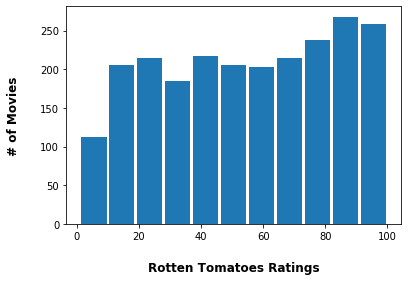

In [21]:
axes = movie_data.hist(column='Rotten Tomatoes Rating', bins=11, grid=False, rwidth=0.9)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("Rotten Tomatoes Ratings", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

## IMDB Ratings Histogram
*The leftmost bin represents the number of missing ratings.* The IMDB ratings form a Gaussian Distribution leaning towards the higher grades (>5). Since these ratings come from a casual audience we can explain the high number of big grades as a more liberal approach to rating a movie. A casual moviegoer isn't bothered by little movie quirks that a critic might notice and does not influence his final rating.

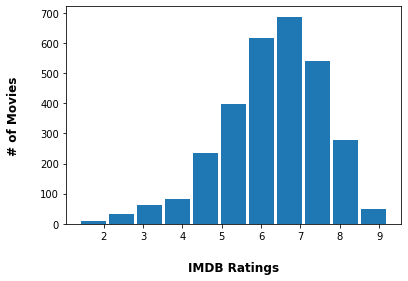

In [22]:
axes = movie_data.hist(column='IMDB Rating', bins=11, grid=False, rwidth=0.9)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("IMDB Ratings", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

## IMBD Votes Histogram
Not much can be derived from this histogram. The first bin contains all the entries with 0 ratings, therefore 0 votes. An interesting fact would be the relatively small number of movies  that have a high number of votes. These movies, being this popular, would accumulate a more balanced rating and present better its quality and worth.

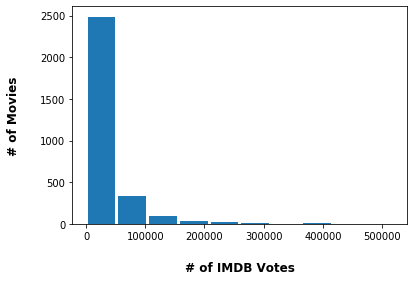

In [23]:
axes = movie_data.hist(column='IMDB Votes', grid=False, rwidth=0.9)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("# of IMDB Votes", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

## Studying the Genres
At the top of the charts sits 'Drama' movies with 'Comedy' close behind. 'Action' movies come third in population which to me seems like a suprise since these types of movies are the ones getting the most attention and casual audience. Maybe it's not considered a Major Genre. An interesting observation is that 'Black Comedies' sit at the bottom while plain comedies at the top. Could be that many are hesitant to label a comedy *black* as it may attract a smaller audience. 'Horror' and 'Thriller' genres have equal population, in spite of the fact they generally influence each other.

In [24]:
movie_data.groupby(['Major Genre']).describe()

US Gross                                         \
                       count          mean           std        min   
Major Genre                                                           
Action                 413.0  6.545096e+07  7.597500e+07      884.0   
Adventure              271.0  1.056038e+08  1.059632e+08   166003.0   
Black Comedy            34.0  1.463791e+07  1.422600e+07    20987.0   
Comedy                 668.0  4.622549e+07  5.351819e+07     3700.0   
Concert/Performance      5.0  2.705059e+07  2.520108e+07  2255000.0   
Documentary             40.0  9.921899e+06  2.212590e+07     1338.0   
Drama                  782.0  2.949196e+07  4.439189e+07      401.0   
Horror                 216.0  3.598851e+07  3.783854e+07      423.0   
Musical                 52.0  4.407028e+07  5.139688e+07    12604.0   
Romantic Comedy        136.0  4.525388e+07  4.895103e+07    10744.0   
Thriller/Suspense      236.0  4.093607e+07  5.823697e+07      527.0   
Western                 35.0  2.675670e+07  3.659837e+07    14873.0   

                                                                         \
                             25%         50%           75%          max   
Major Genre                                                               
Action               17650704.00  40934175.0  8.328736e+07  760167650.0   
Adventure            26526750.00  70107728.0  1.436965e+08  460998007.0   
Black Comedy          3676555.25  10670896.0  2.160070e+07   60355347.0   
Comedy                8584889.00  26109436.0  6.409000e+07  285761243.0   
Concert/Performance  10363341.00  19184820.0  3.816802e+07   65281781.0   
Documentary            216882.75   2161969.0  1.108869e+07  119114517.0   
Drama                 2942983.75  13406626.5  3.920161e+07  435110554.0   
Horror               13078107.00  25563786.5  4.678845e+07  260000000.0   
Musical               4514593.00  23399591.5  6.338042e+07  184925485.0   
Romantic Comedy      10307915.25  27764297.0  6.011732e+07  241438208.0   
Thriller/Suspense     8779596.00  25748774.5  5.335346e+07  600788188.0   
Western               3704574.50  15527125.0  3.730528e+07  184208842.0   

                    Worldwide Gross                                         \
                              count          mean           std        min   
Major Genre                                                                  
Action                        417.0  1.449295e+08  2.062460e+08      884.0   
Adventure                     272.0  2.429447e+08  2.702817e+08   407488.0   
Black Comedy                   35.0  2.356206e+07  3.163540e+07    20987.0   
Comedy                        670.0  7.520007e+07  1.036011e+08     3700.0   
Concert/Performance             5.0  3.072440e+07  2.602868e+07  2255000.0   
Documentary                    40.0  1.747361e+07  4.129980e+07     1338.0   
Drama                         783.0  5.169370e+07  8.805577e+07      401.0   
Horror                        217.0  6.139022e+07  7.842904e+07      423.0   
Musical                        52.0  7.509305e+07  9.231048e+07    12604.0   
Romantic Comedy               136.0  8.725475e+07  1.065460e+08    10744.0   
Thriller/Suspense             237.0  8.126872e+07  1.580954e+08      527.0   
Western                        36.0  3.614925e+07  7.233835e+07    14873.0   

                                                                           \
                             25%          50%           75%           max   
Major Genre                                                                 
Action               25852508.00   79817937.0  1.875000e+08  2.767891e+09   
Adventure            44139237.25  133473461.5  3.479199e+08  1.133027e+09   
Black Comedy          4431179.50   14943582.0  2.823390e+07  1.634157e+08   
Comedy               10642101.75   34572289.0  9.458018e+07  6.204954e+08   
Concert/Performance  19184820.00   22664070.0  3.823634e+07  7.128178e+07   
Documentary            243012.50    26222

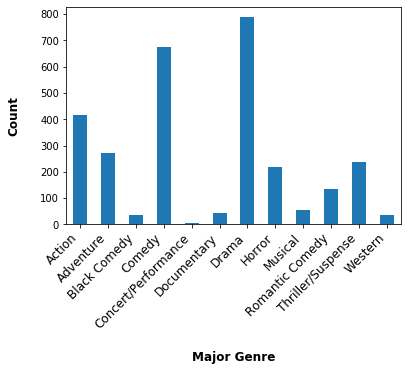

In [25]:
genres = movie_data.groupby(['Major Genre']).size()
axes = genres.plot.bar()
labels = axes.get_xticklabels()
axes.set_xlabel("Major Genre", labelpad=20, weight='bold', size=12)
axes.set_ylabel("Count", labelpad=20, weight='bold', size=12)
_ = axes.set_xticklabels(labels, 
                         rotation=45, 
                         horizontalalignment='right', 
                         fontsize='12')

## A Deeper Look at Grossings

In the graphs below, we notice that the distribution changes on a logarithmic scale. It is a left skewed lognormal distribution with the mean being bigger than the median. This is making our previous assumptions **wrong**. The first histogram, made on the worldwide grossings, actually represents a heavily right skewed normal distribution. This shows a discrepancy, which can be summed up as, most movies make really small grossings while the outliers, or the big blockbusters, are making many times more than that upping the average. By calculating the number of movies above the mean gross interval (meanG), we find that only 535 out of our whole dataset are making above, or close enough, the mean gross.

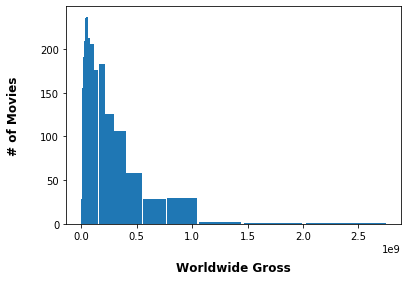

In [26]:
logbins_gross = np.geomspace(movie_data['Worldwide Gross'].min(skipna=True), max(movie_data['Worldwide Gross']))
axes = movie_data.hist(column='Worldwide Gross', bins=logbins_gross, grid=False, rwidth=0.95)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("Worldwide Gross", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
    #ax.set_yscale('log')
    #ax.set_xscale('log')

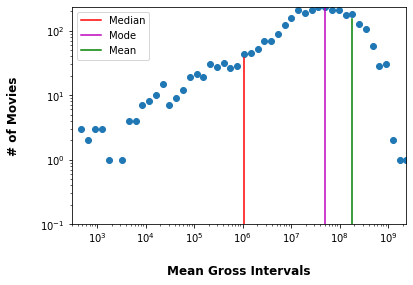

In [27]:
c = pd.cut(movie_data['Worldwide Gross'], logbins_gross)
groups = c.groupby(c)
counts = groups.size()

# Create a dictionary with the intervals, the mean of the interval and the number of movies within it,
# which we will convert to a dataframe.
gross_data = {}
for i in range(logbins_gross.size-1):
    gross_data[i] = (logbins_gross[i], logbins_gross[i+1], logbins_gross[i]+((logbins_gross[i+1]-logbins_gross[i])/2), counts[i])
df_gross = pd.DataFrame.from_dict(gross_data, orient='index', columns=['Start', 'End', 'Gross Interval Mean','No of Movies'])

# Start plotting
ax = plt.subplot(1, 1, 1)
ax.scatter(df_gross['Gross Interval Mean'], df_gross['No of Movies'])
# Fancy stuff
ax.set_title("")
ax.set_xlabel("Mean Gross Intervals", labelpad=20, weight='bold', size=12)
ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
ax.set_yscale('log')
ax.set_xscale('log')
_ = ax.set_ylim([0.1, df_gross['No of Movies'].max()])
_ = ax.set_xlim([300.0, df_gross['Gross Interval Mean'].max()])

# Median, Mode & Mean
ax.axvline(x = 1067160.1727608691, ymax=0.765, label='Median', color='r')
ax.axvline(x = 50476340.0, ymax=1, label='Mode', color='m')
ax.axvline(x = 177278453.44733316, ymax=0.945, label='Mean', color='g')
_ = ax.legend(loc='best')

### Gross Intervals Median & Mean Calculations

In [28]:
medianG = df_gross['Gross Interval Mean'].median()
medianG

1067160.1727608691

In [29]:
meanG = df_gross['Gross Interval Mean'].mean()
meanG

177278453.44733316

In [30]:
df_gross.loc[df_gross['Gross Interval Mean'] > medianG, 'No of Movies'].sum()

2812

In [31]:
df_gross.loc[df_gross['Gross Interval Mean'] < medianG, 'No of Movies'].sum()

291

In [32]:
df_gross.loc[df_gross['Gross Interval Mean'] > meanG, 'No of Movies'].sum()

535

In [33]:
df_gross.loc[df_gross['Gross Interval Mean'] < meanG, 'No of Movies'].sum()

2611

In [34]:
df_gross

,Start,End,Gross Interval Mean,No of Movies
0,4.010000e+02,5.529882e+02,4.769941e+02,3
1,5.529882e+02,7.625835e+02,6.577859e+02,2
2,7.625835e+02,1.051620e+03,9.071019e+02,3
3,1.051620e+03,1.450209e+03,1.250914e+03,3
4,1.450209e+03,1.999871e+03,1.725040e+03,1
5,1.999871e+03,2.757868e+03,2.378870e+03,0
6,2.757868e+03,3.803164e+03,3.280516e+03,1
7,3.803164e+03,5.244651e+03,4.523907e+03,4
8,5.244651e+03,7.232494e+03,6.238572e+03,4
9,7.232494e+03,9.973776e+03,8.603135e+03,7


## A Deeper Look at IMDB Votes
Like the worldwide grossings, IMDB Votes follow a lognormal distribution with a big chunk of our dataset having around 10000 and 100000 votes. Only around 482 movies sit above the mean interval, making about 17% of the set. The distribution was expected since we could see a normal distribution forming from the initial histogram. An interesting thing we noticed was the strange distribution that was forming if the number of intervals was above 19. Due to the size of our dataset, creating many small intervals causes many of them to be either empty or have 1 or 2 items in them. This leads to strange artifact on the scatter plot which we demonstrate by creating one with 24 intervals. *(!Note: The 24 Interval scatter plot is only for demonstration purposes. It was not considered when extracting results!)*

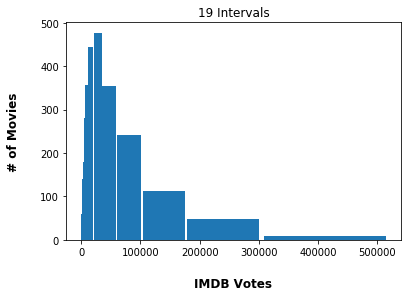

In [35]:
logbins_votes = np.geomspace(movie_data['IMDB Votes'].min(skipna=True), max(movie_data['IMDB Votes']), num=20)
logbins_show = np.geomspace(movie_data['IMDB Votes'].min(skipna=True), max(movie_data['IMDB Votes']), num=25)
axes = movie_data.hist(column='IMDB Votes', bins=logbins_votes, grid=False, rwidth=0.95)
for ax in axes.flatten():
    ax.set_title("19 Intervals")
    ax.set_xlabel("IMDB Votes", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
    #ax.set_yscale('log')
    #ax.set_xscale('log')

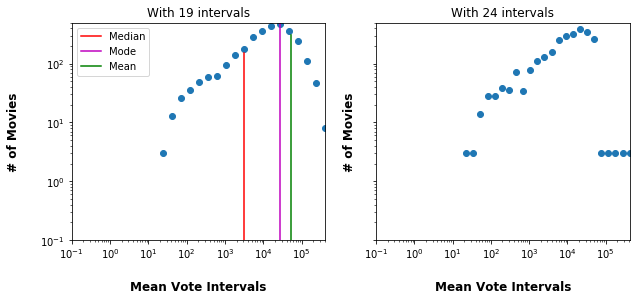

In [36]:
####################
### 19 Intervals ###
####################

c = pd.cut(movie_data['IMDB Votes'], logbins_votes)
groups = c.groupby(c)
counts = groups.size()

# Create a dictionary with the intervals, the mean of the interval and the number of movies within it,
# which we will convert to a dataframe.
gross_data = {}
for i in range(logbins_votes.size-1):
    gross_data[i] = (logbins_votes[i], logbins_votes[i+1], logbins_votes[i]+((logbins_votes[i+1]-logbins_votes[i])/2), counts[i])
df_votes = pd.DataFrame.from_dict(gross_data, orient='index', columns=['Start', 'End', 'Votes Interval Mean','No of Movies'])

fig, axes = plt.subplots(1, 2, sharey='row', figsize=(10,4))

# Start plotting
ax = axes[0]
ax.scatter(df_votes['Votes Interval Mean'], df_votes['No of Movies'])
# Fancy stuff
ax.set_title("With 19 intervals")
ax.set_xlabel("Mean Vote Intervals", labelpad=20, weight='bold', size=12)
ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
ax.set_yscale('log')
ax.set_xscale('log')
_ = ax.set_ylim([0.1, df_votes['No of Movies'].max()])
_ = ax.set_xlim([0.1, df_votes['Votes Interval Mean'].max()])

# Median, Mode & Mean
ax.axvline(x = 3170.4335763375516, ymax=0.86, label='Median', color='r')
ax.axvline(x = 27551.112956, ymax=1, label='Mode', color='m')
ax.axvline(x = 51810.575038387826, ymax=0.945, label='Mean', color='g')
_ = ax.legend(loc='best')

####################
### 24 Intervals ###
####################

c = pd.cut(movie_data['IMDB Votes'], logbins_show)
groups = c.groupby(c)
counts = groups.size()

# Create a dictionary with the intervals, the mean of the interval and the number of movies within it,
# which we will convert to a dataframe.
gross_data = {}
for i in range(logbins_show.size-1):
    gross_data[i] = (logbins_show[i], logbins_show[i+1], logbins_show[i]+((logbins_show[i+1]-logbins_show[i])/2), counts[i])
df_show = pd.DataFrame.from_dict(gross_data, orient='index', columns=['Start', 'End', 'Votes Interval Mean','No of Movies'])

ax = axes[1]
ax.scatter(df_show['Votes Interval Mean'], df_show['No of Movies'])
# Fancy stuff
ax.set_title("With 24 intervals")
ax.set_xlabel("Mean Vote Intervals", labelpad=20, weight='bold', size=12)
ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
ax.set_yscale('log')
ax.set_xscale('log')
_ = ax.set_ylim([0.1, 500])
_ = ax.set_xlim([0.1, df_show['Votes Interval Mean'].max()])

### IMDB Vote Intervals Median & Mean Calculations

In [37]:
medianG = df_votes['Votes Interval Mean'].median()
medianG

3170.4335763375516

In [38]:
meanG = df_votes['Votes Interval Mean'].mean()
meanG

51810.575038387826

In [39]:
df_votes.loc[df_votes['Votes Interval Mean'] > medianG, 'No of Movies'].sum()

2323

In [40]:
df_votes.loc[df_votes['Votes Interval Mean'] < medianG, 'No of Movies'].sum()

482

In [41]:
df_votes.loc[df_votes['Votes Interval Mean'] > meanG, 'No of Movies'].sum()

410

In [42]:
df_votes.loc[df_votes['Votes Interval Mean'] < meanG, 'No of Movies'].sum()

2575

In [43]:
df_votes

,Start,End,Votes Interval Mean,No of Movies
0,18.000000,30.904920,24.452460,3
1,30.904920,53.061894,41.983407,13
2,53.061894,91.104089,72.082992,26
3,91.104089,156.420256,123.762173,36
4,156.420256,268.564197,212.492227,49
5,268.564197,461.108617,364.836407,59
6,461.108617,791.695835,626.402226,62
7,791.695835,1359.294258,1075.495046,94
8,1359.294258,2333.826702,1846.560480,140
9,2333.826702,4007.040451,3170.433576,180


# 2. Correlations

## Pairwise Scatter Plots
The following scatter plots are comprised of pairs between our dataset attributes.

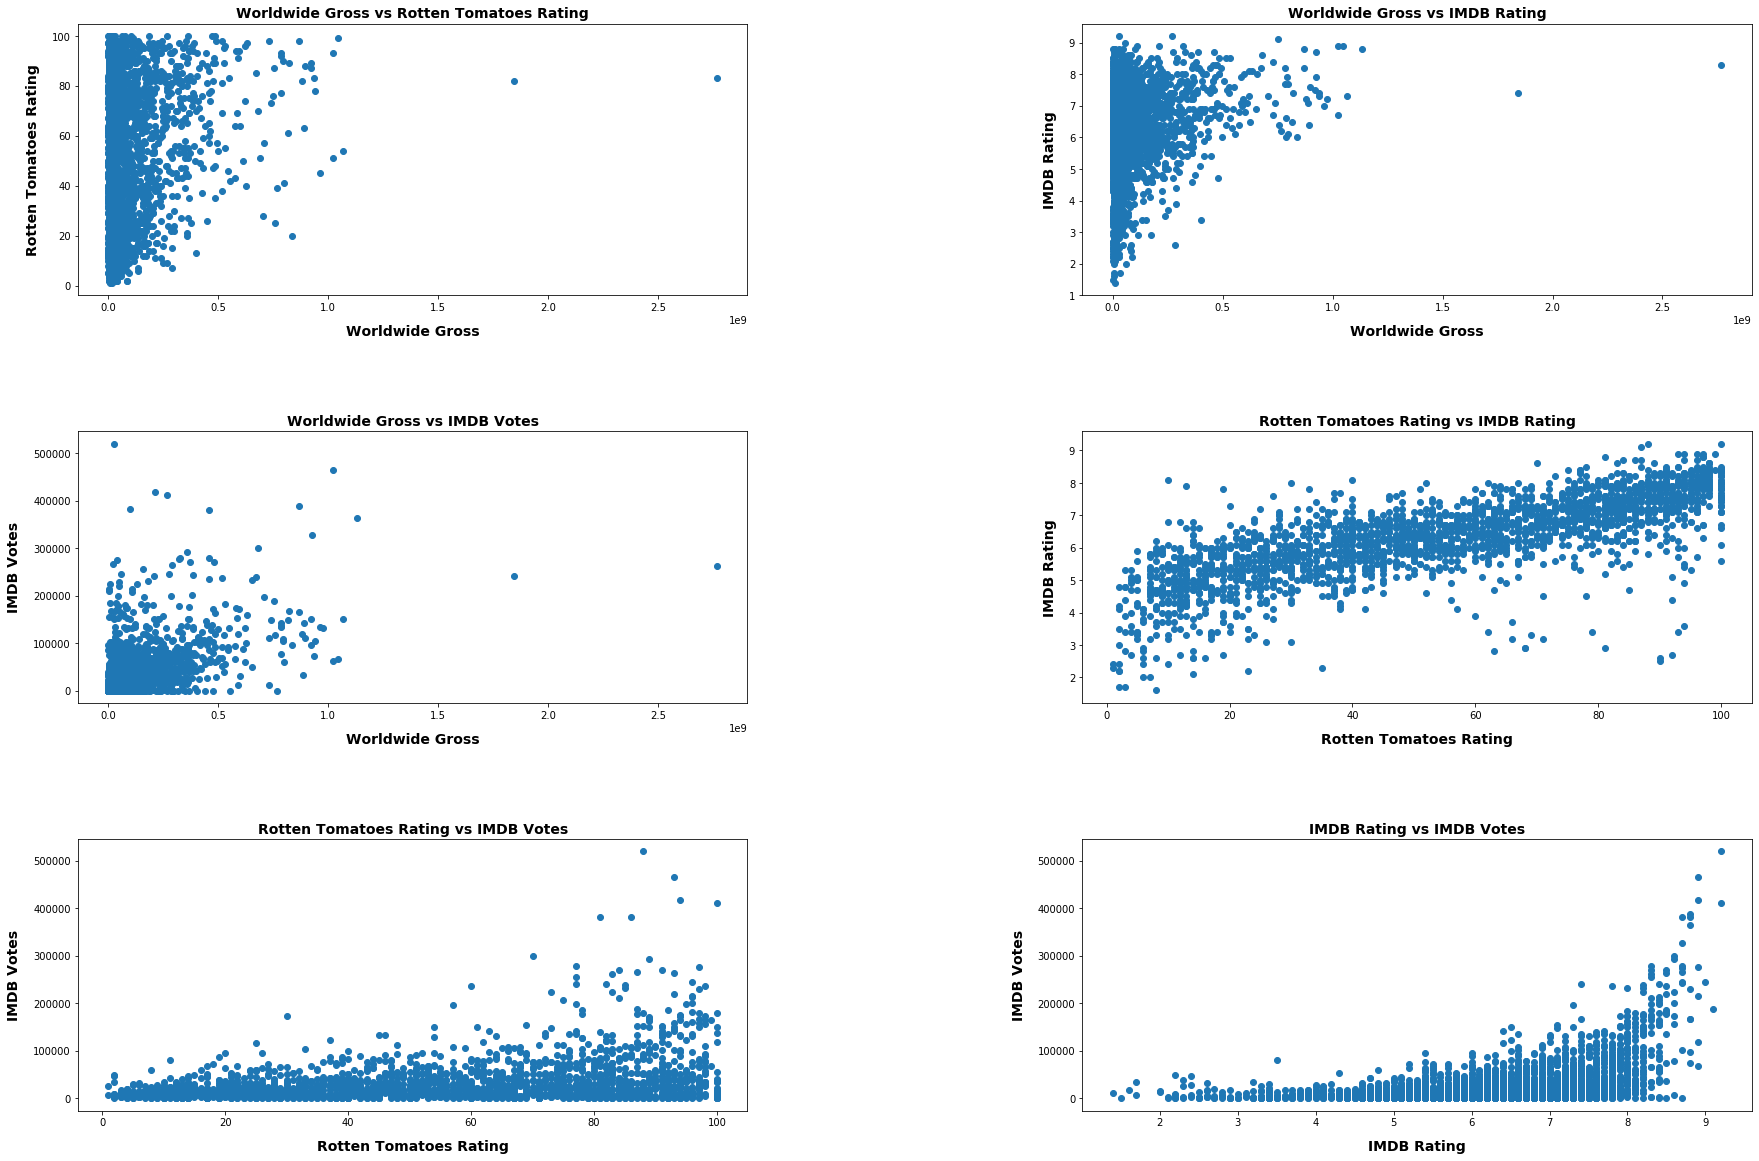

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(30,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Worlwide Gross vs Rotten Tomatoes Rating
ax = axes[0][0]
ax.scatter(movie_data['Worldwide Gross'], movie_data['Rotten Tomatoes Rating'])
ax.set_title("Worldwide Gross vs Rotten Tomatoes Rating", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("Rotten Tomatoes Rating", labelpad=12, weight='bold', size=14)

# Worlwide Gross vs IMDB Rating
ax = axes[0][1]
ax.scatter(movie_data['Worldwide Gross'], movie_data['IMDB Rating'])
ax.set_title("Worldwide Gross vs IMDB Rating", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Rating", labelpad=12, weight='bold', size=14)

# Worlwide Gross vs IMDB Votes
ax = axes[1][0]
ax.scatter(movie_data['Worldwide Gross'], movie_data['IMDB Votes'])
ax.set_title("Worldwide Gross vs IMDB Votes", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Votes", labelpad=12, weight='bold', size=14)

# Rotten Tomatoes Rating vs IMDB Rating
ax = axes[1][1]
ax.scatter(movie_data['Rotten Tomatoes Rating'], movie_data['IMDB Rating'])
ax.set_title("Rotten Tomatoes Rating vs IMDB Rating", weight='bold', size=14)
ax.set_xlabel("Rotten Tomatoes Rating", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Rating", labelpad=12, weight='bold', size=14)

# Rotten Tomatoes Rating vs IMDB Votes
ax = axes[2][0]
ax.scatter(movie_data['Rotten Tomatoes Rating'], movie_data['IMDB Votes'])
ax.set_title("Rotten Tomatoes Rating vs IMDB Votes", weight='bold', size=14)
ax.set_xlabel("Rotten Tomatoes Rating", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Votes", labelpad=12, weight='bold', size=14)

# IMDB Rating vs IMDB Votes
ax = axes[2][1]
ax.scatter(movie_data['IMDB Rating'], movie_data['IMDB Votes'])
ax.set_title("IMDB Rating vs IMDB Votes", weight='bold', size=14)
ax.set_xlabel("IMDB Rating", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Votes", labelpad=12, weight='bold', size=14)

In [45]:
movie_data.corr(method='pearson')

,US Gross,Worldwide Gross,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
US Gross,1.000000,0.939616,0.624038,0.263259,0.181010,0.197641,0.551073
Worldwide Gross,0.939616,1.000000,0.666848,0.317640,0.159963,0.198180,0.551215
Production Budget,0.624038,0.666848,1.000000,0.348830,-0.088740,0.015208,0.339702
Running Time (min),0.263259,0.317640,0.348830,1.000000,0.295653,0.387499,0.404181
Rotten Tomatoes Rating,0.181010,0.159963,-0.088740,0.295653,1.000000,0.743118,0.335410
IMDB Rating,0.197641,0.198180,0.015208,0.387499,0.743118,1.000000,0.467347
IMDB Votes,0.551073,0.551215,0.339702,0.404181,0.335410,0.467347,1.000000


In [46]:
movie_data.corr(method='spearman')

,US Gross,Worldwide Gross,Production Budget,Running Time (min),Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
US Gross,1.000000,0.948275,0.647926,0.167357,0.125011,0.114899,0.621936
Worldwide Gross,0.948275,1.000000,0.678200,0.205229,0.110353,0.142665,0.653986
Production Budget,0.647926,0.678200,1.000000,0.331546,-0.220126,-0.088077,0.432508
Running Time (min),0.167357,0.205229,0.331546,1.000000,0.296243,0.385113,0.346082
Rotten Tomatoes Rating,0.125011,0.110353,-0.220126,0.296243,1.000000,0.776512,0.312256
IMDB Rating,0.114899,0.142665,-0.088077,0.385113,0.776512,1.000000,0.463253
IMDB Votes,0.621936,0.653986,0.432508,0.346082,0.312256,0.463253,1.000000


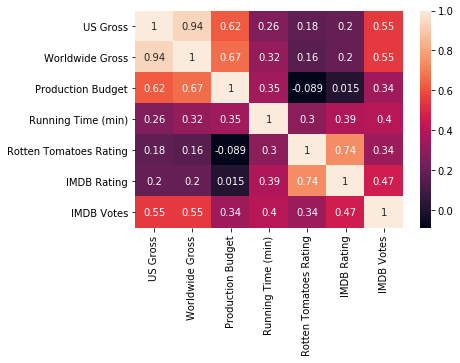

In [47]:
_ = sns.heatmap(movie_data.corr(), annot=True)

## Worldwide Gross vs Rotten Tomatoes Rating
By studying the scatter plot we can conclude that grossings aren't affected by the critics' scores. We are seeing movies that are scored high but do not generate enough revenue and the other way around. Metrics indicate that there's little to no correlation between the two. From personal experience, I can say that these results reflect somewhat the truth as many times critics have swayed my opinion, it's more of a personal decision if I want to go see a movie.

In [48]:
x = movie_data['Worldwide Gross']
y = movie_data['Rotten Tomatoes Rating']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 1.0994133119605388e-14


## Worldwide Gross vs IMDB Rating
This case is identical with the Rotten Tomatoes Ratings. The metrics are close to each other, a little bit higher compared to the previous pair. Even by looking at the scatter plots of the two pairs, they seem to be almost identical. The difference is more high-scored movies which would result in a higher average rating. There seems to be no correlation and can be summed up as "One cannot rate a movie without watching it first. By watching it, he is increasing the grossings. Also, not all people that watch the movie rate it afterwards. This creates a unpredictable distribution that does not give any useful results."

In [49]:
x = movie_data['Worldwide Gross']
y = movie_data['IMDB Rating']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 1.4911218964306517e-27


## Worldwide Gross vs IMDB Votes
Here we see higher metrics indicating moderate to strong correlation. This can be explained by estimating a mean percentage of moviegoers that rate the movie after watching it. If a movie has a high worldwide gross that means many people watched it. Subsequently, a percentage of those took the time to rate it. So, the more people watch the movie, the more votes it will *probably* have.

In [50]:
x = movie_data['Worldwide Gross']
y = movie_data['IMDB Votes']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 1.5377719012184903e-234


## Rotten Tomatoes Rating vs IMDB Rating
Here's the meat! The clash of titans! Critics vs Casuals! And the winner is... noone actually. In fact, they seem to be following a linear distribution which is a little bit raised to the side of the general audience. The metrics come to confirm this with the two having a strong positive correlation. This means that if a movie is considered good from one group, it will probably, with a high chance, be considered by the other group too. It is also statistically significant with a p-value equal to pure 0.0!

In [51]:
x = movie_data['Rotten Tomatoes Rating']
y = movie_data['IMDB Rating']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 0.0


## Rotten Tomatoes Rating vs IMDB Votes
The comparison of these attributes doesn't really make sense. It doesn't produce any meaningful results.

In [52]:
x = movie_data['Rotten Tomatoes Rating']
y = movie_data['IMDB Votes']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 1.5141059045952563e-60


## IMDB Rating vs IMDB Votes
This comparison presents really interesting results. It seems to be following a logarithmic distribution. The metrics show a moderate correlation. From what we can gather from the scatter plot, the higher the number of votes - the higher the final rating. (!!) An initial thought would be that the more votes that a movie has the more weighted the rating would be. Since this does not seem to be the case, we can explain it by concluding that if a movie is actually good and worthy of a high rating then more people are eager to go online and rate it. Probably it has to do with a desire to show others that the movie the watched was really good and urge them to do the same.

In [53]:
x = movie_data['IMDB Rating']
y = movie_data['IMDB Votes']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 6.553464434326167e-162


## Presenting Worldwide Gross Plots Better
We observe, on the worldwide gross scatter plots, that most of our data is packed on the left side of the plot. This is due to some outliers that are present in all three plots, mainly two movies which have really high grossings compared to the rest of the dataset. This can be remedied by plotting on a log scale in order to present the low-grossing data better. More specifically, the first two plots are going to be semi-log plots. That's because the x-axis, the worldwide gross, covers a wide range of values while the y-axis covers values from 0 to 10 and 0 to 100 respectively. Lastly, the third plot is going to be made on a loglog scale since both variables cover a wide range and it helps us determine their relationship better.

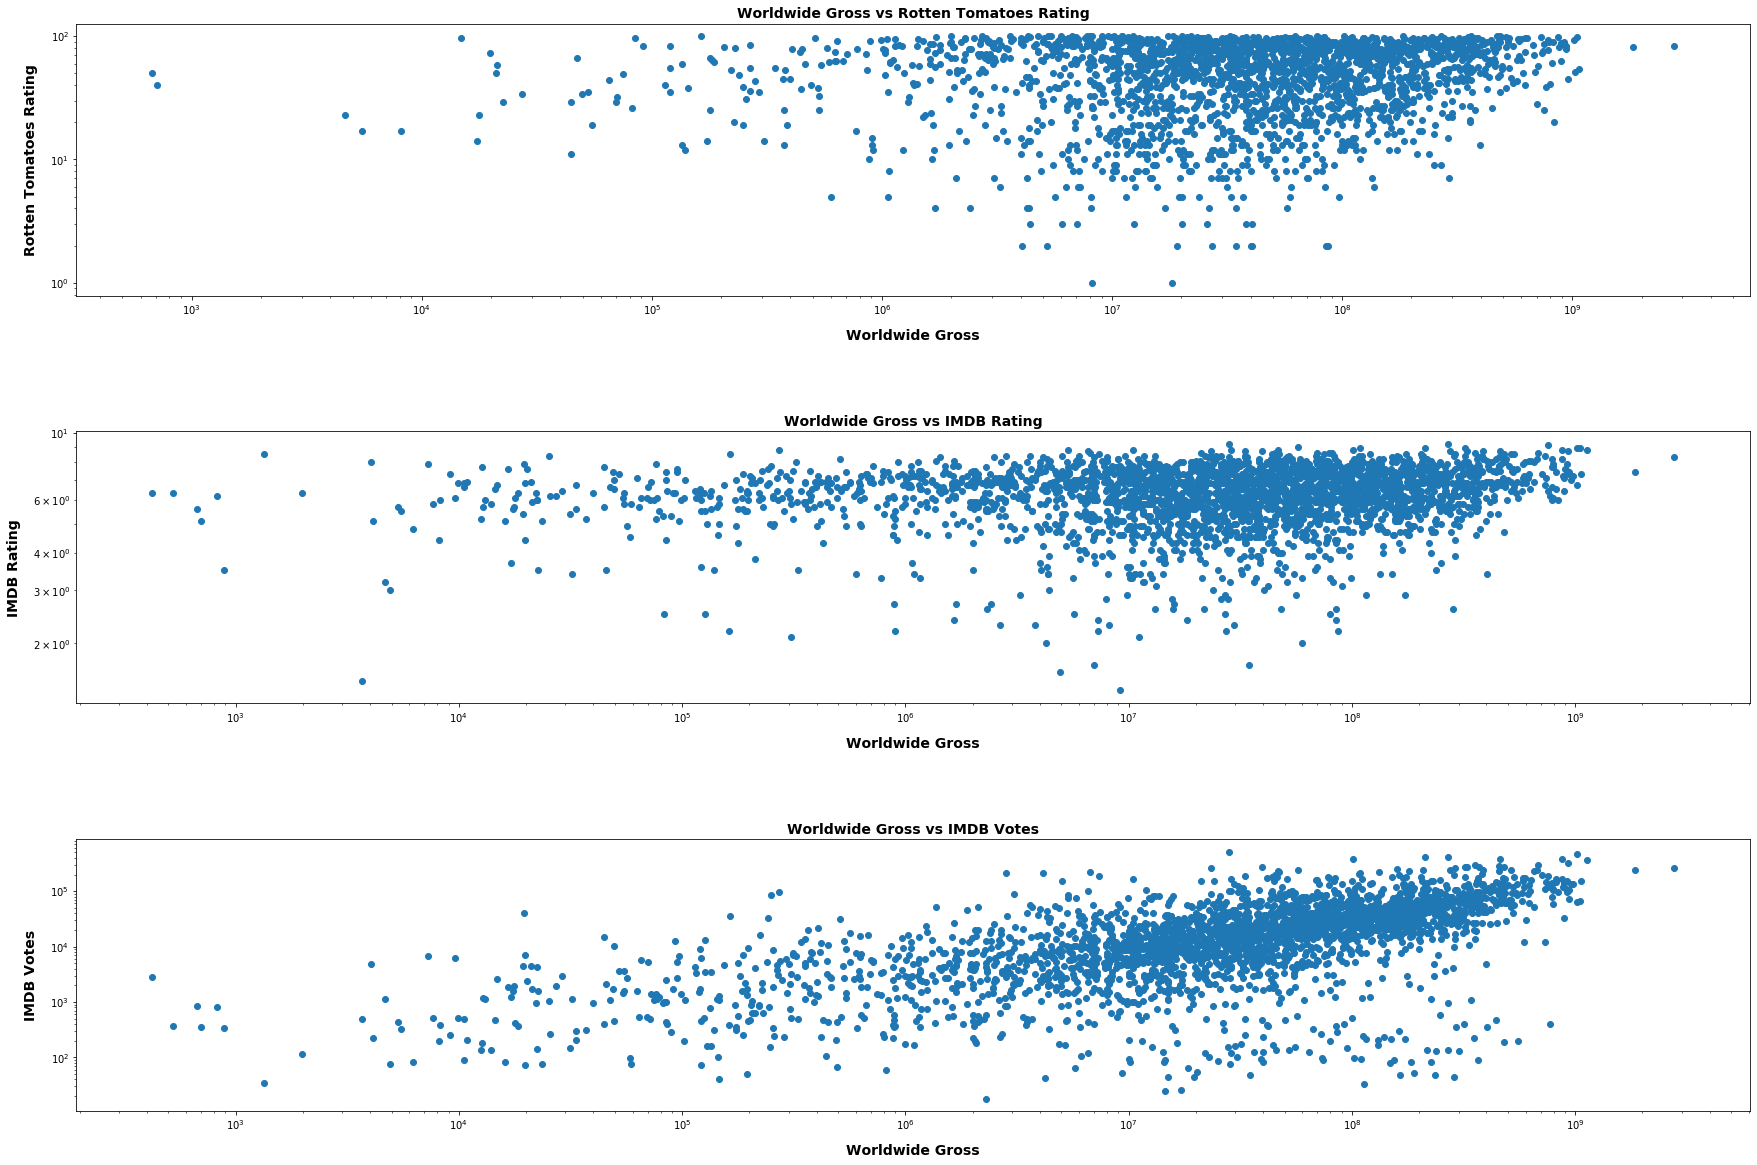

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(30,20))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Worlwide Gross vs Rotten Tomatoes Rating
ax = axes[0]
ax.scatter(movie_data['Worldwide Gross'], movie_data['Rotten Tomatoes Rating'])
ax.set_title("Worldwide Gross vs Rotten Tomatoes Rating", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_ylabel("Rotten Tomatoes Rating", labelpad=12, weight='bold', size=14)

# Worlwide Gross vs IMDB Rating
ax = axes[1]
ax.scatter(movie_data['Worldwide Gross'], movie_data['IMDB Rating'])
ax.set_title("Worldwide Gross vs IMDB Rating", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_ylabel("IMDB Rating", labelpad=12, weight='bold', size=14)

# Worlwide Gross vs IMDB Votes
ax = axes[2]
ax.scatter(movie_data['Worldwide Gross'], movie_data['IMDB Votes'])
ax.set_title("Worldwide Gross vs IMDB Votes", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_ylabel("IMDB Votes", labelpad=12, weight='bold', size=14)

**Notes:** 
1. The first two plots became much more clear and easy to understand. We still spot a concentration of high values for which we cannot do much. Rather, we can conclude that the general population and the critics rate similarly regardless of grossings.
2. On the third plot we can clearly see a line forming through the data. This graph displays a y = a*(x^k) relationship. We can determine the parameters for this equation from the line that is forming in the loglog plot.

## Genres vs Grossings

In [55]:
df = movie_data.groupby(['Major Genre']).mean().reset_index()
df.index = df['Major Genre']

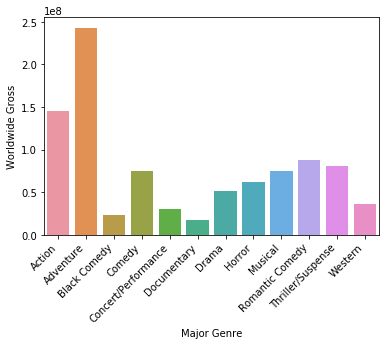

In [56]:
bp = sns.barplot(x='Major Genre',y='Worldwide Gross', data = df, estimator=np.nanmean, ci=95, capsize=12)
_ = bp.set_xticklabels(bp.get_xticklabels(), rotation=45, horizontalalignment='right')

# 3. Movies throughout the decades
Are movies actually getting worse with each passing decade? Are people claiming that the movies of the past are marginally better by what's being made today right? We'll take a look at the data and try to give you a definitive answer!
**Note:** We will not be including the 20s, 30s for having little to no data and the 2020 decade, since this set contains either unreleased content or they are a bad entry, from our calculations.)

In [57]:
df = movie_data
df.index = df['Release Date']
df = df.resample('10Y')
df.count()[['Title','Rotten Tomatoes Rating','IMDB Rating']]

,Title,Rotten Tomatoes Rating,IMDB Rating
Release Date,,,
1920-12-31,1,0,0
1930-12-31,5,4,5
1940-12-31,15,10,13
1950-12-31,20,16,20
1960-12-31,39,32,37
1970-12-31,68,50,65
1980-12-31,113,81,107
1990-12-31,263,187,253
2000-12-31,929,732,885


In [58]:
df.mean()[['Rotten Tomatoes Rating','IMDB Rating']]

,Rotten Tomatoes Rating,IMDB Rating
Release Date,,
1920-12-31,NaN,NaN
1930-12-31,81.000000,7.820000
1940-12-31,97.700000,7.476923
1950-12-31,92.687500,7.250000
1960-12-31,79.687500,7.167568
1970-12-31,81.360000,7.184615
1980-12-31,75.567901,6.671028
1990-12-31,67.224599,6.327668
2000-12-31,53.427596,6.142034


*Pandas does not let you drop resampling results unfortunately. Couldn't find a way of bypassing this.
All assumptions will be made without taking into account the aforementioned decades.*

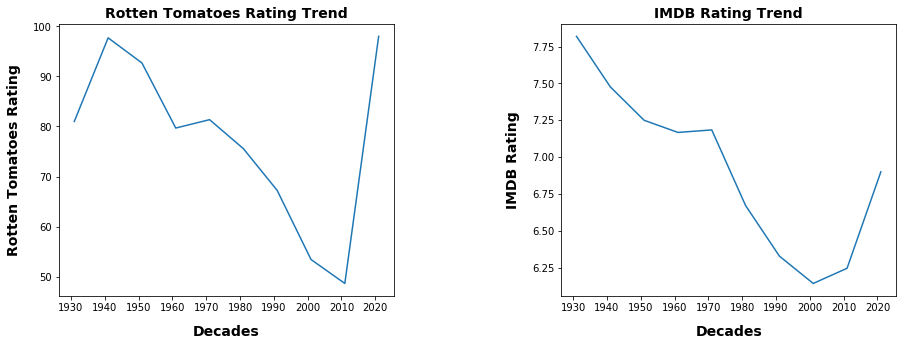

In [59]:
#df.drop(df.index[[0,1]])
#df.drop(df.index[-1])
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax = axes[0]
ax.plot(df.mean()[['Rotten Tomatoes Rating']])
ax.set_title("Rotten Tomatoes Rating Trend", weight='bold', size=14)
ax.set_xlabel("Decades", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("Rotten Tomatoes Rating", labelpad=12, weight='bold', size=14)

ax = axes[1]
ax.plot(df.mean()[['IMDB Rating']])
ax.set_title("IMDB Rating Trend", weight='bold', size=14)
ax.set_xlabel("Decades", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("IMDB Rating", labelpad=12, weight='bold', size=14)

From the plot above, we can get a really good look at the trend that's being followed throughout the decades and it's a declining one. Older movies indeed have higher online ratings **and** critic ratings. But is that absolutely correct? Can we trust our findings? The answer to that is no for many reasons.
1. People are emotional beings. They dream of the past being utopic compared to nowadays. They are quick to shut down new and daring ideas. This nostalgia is being translated in higher ratings for old movies.
2. There was not a central rating system back then. All of our data exists from the later decades of the century. So, our sample is not 'native' in it's nature and what it is representing. Also, the number of ratings is actually a lot bigger for recent years plus a lot more movies are being made compared to the 30s and 40s for example.
3. Do we trust the critics? I'd argue that their vote may be less emotional than the online ratings but nostalgic to some degree nonetheless.

I do believe older movies had a certain charm in them which is not easily found today. Maybe movies nowadays are indeed different than older movies. Is that so bad though? Change isn't always a bad thing.

# 4. Final Question

## Does a big budget mean a higher gross ?
First step is to check the distribution of the production budget in our data:

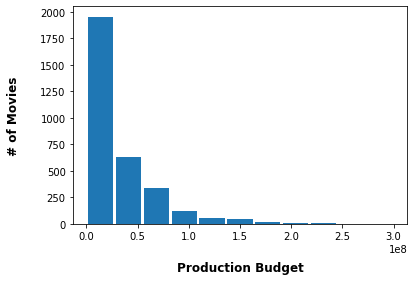

In [60]:
axes = movie_data.hist(column='Production Budget', bins=11, grid=False, rwidth=0.9)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("Production Budget", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

The production budgets in our dataset follow the geometric distribution. We need to analyze further to see whats happening behind the leftmost bin in the histogram. Since, we've already came across this problem, we need to split the data into logbins and create a scatter plot on a loglog scale.

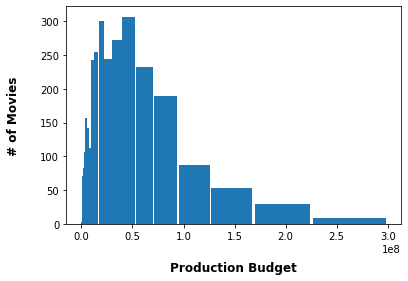

In [61]:
logbins_budget = np.geomspace(movie_data['Production Budget'].min(skipna=True), max(movie_data['Production Budget']))
axes = movie_data.hist(column='Production Budget', bins=logbins_budget, grid=False, rwidth=0.95)
for ax in axes.flatten():
    ax.set_title("")
    ax.set_xlabel("Production Budget", labelpad=20, weight='bold', size=12)
    ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)

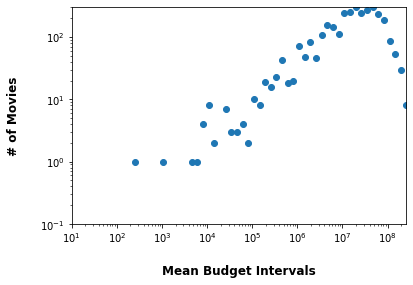

In [62]:
c = pd.cut(movie_data['Production Budget'], logbins_budget)
groups = c.groupby(c)
counts = groups.size()

# Create a dictionary with the intervals, the mean of the interval and the number of movies within it,
# which we will convert to a dataframe.
budget_data = {}
for i in range(logbins_gross.size-1):
    budget_data[i] = (logbins_budget[i], logbins_budget[i+1], logbins_budget[i]+((logbins_budget[i+1]-logbins_budget[i])/2), counts[i])
df_budget = pd.DataFrame.from_dict(budget_data, orient='index', columns=['Start', 'End', 'Budget Interval Mean','No of Movies'])

# Start plotting
ax = plt.subplot(1, 1, 1)
ax.scatter(df_budget['Budget Interval Mean'], df_budget['No of Movies'])
# Fancy stuff
ax.set_title("")
ax.set_xlabel("Mean Budget Intervals", labelpad=20, weight='bold', size=12)
ax.set_ylabel("# of Movies", labelpad=20, weight='bold', size=12)
ax.set_yscale('log')
ax.set_xscale('log')
_ = ax.set_ylim([0.1, df_budget['No of Movies'].max()])
_ = ax.set_xlim([10, df_budget['Budget Interval Mean'].max()])

Next check whether there is a correlation between the two in question. We create a scatter plot for the two values:

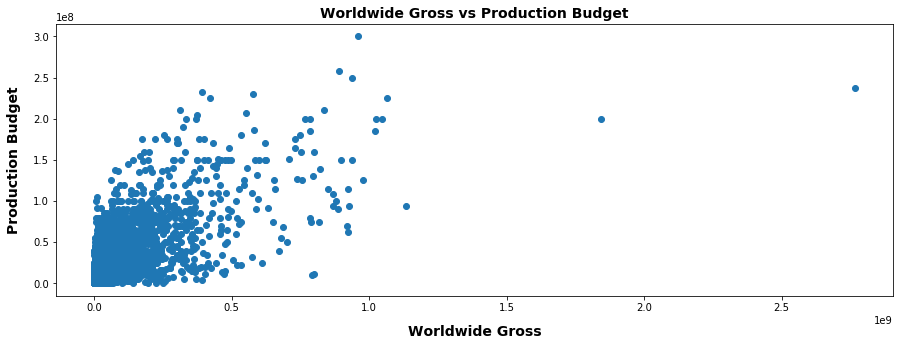

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Worlwide Gross vs Production Budget
ax = axes
ax.scatter(movie_data['Worldwide Gross'], movie_data['Production Budget'])
ax.set_title("Worldwide Gross vs Production Budget", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
_ = ax.set_ylabel("Production Budget", labelpad=12, weight='bold', size=14)

As with previous world gross scatter plots, most of our data is packed closely together with a few outliers dragging the value range. So, we plot on a loglog scale:

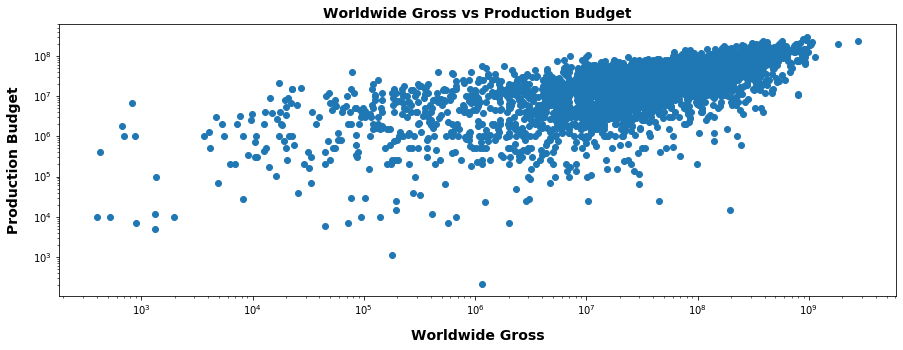

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Worlwide Gross vs Production Budget
ax = axes
ax.scatter(movie_data['Worldwide Gross'], movie_data['Production Budget'])
ax.set_title("Worldwide Gross vs Production Budget", weight='bold', size=14)
ax.set_xlabel("Worldwide Gross", labelpad=12, weight='bold', size=14)
ax.set_xscale('log')
ax.set_yscale('log')
_ = ax.set_ylabel("Production Budget", labelpad=12, weight='bold', size=14)

Now, something like a linear correlation is starting to appear. Let's check the Pearson and Spearman metrics:

In [65]:
x = movie_data['Worldwide Gross'].corr(movie_data['Production Budget'], method='pearson')
print("Pearson = %s" %(str(x)))

Pearson = 0.6668481643107463


In [66]:
x = movie_data['Worldwide Gross'].corr(movie_data['Production Budget'], method='spearman')
print("Spearman = %s" %(str(x)))

Spearman = 0.6781996368919806


In [67]:
x = movie_data['Worldwide Gross']
y = movie_data['Production Budget']
not_nan_df = np.logical_or(x.isnull(), y.isnull())
_,pval = stats.pearsonr(x[~not_nan_df], y[~not_nan_df])
print("p-value = %s" %(str(pval)))

p-value = 0.0


Indeed, the metrics indicate a moderate to strong correlation between the data. Due to the linearity of the data we can conclude that **higher budget equals higher grossings**! Shocking I KNOW!